In [1]:
# Import dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the API Key
from config import weather_api_key

# Import the time and datetime module from the datetime library.
import requests
import time 
from datetime import datetime

In [2]:
# Create a set of random latituddes and longitudes combinations.
lats = np.random.uniform(low = -90.000, high=90.000, size=15000)
lngs = np.random.uniform(low = -180.000, high = 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities=[]
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the cities is unique then will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging 
print("Beginning Data Retrieval")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval
------------------------


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging 
print("Beginning Data Retrieval")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the data to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_date

        # Append the city information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat":city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                        })
    except:
        print ("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("   Data Retrieval Complete   ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | klaksvik
Processing Record 5 of Set 1 | connersville
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | salalah
Processing Record 9 of Set 1 | huarmey
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 | gat
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | sorland
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | kampot
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | tessaoua
Processing Record 20 of Set 1 | kaeo
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | baker city
Processing Record 23 of Set 1 | 

Processing Record 35 of Set 4 | imeni poliny osipenko
Processing Record 36 of Set 4 | tura
Processing Record 37 of Set 4 | hualmay
Processing Record 38 of Set 4 | grand centre
City not found. Skipping...
Processing Record 39 of Set 4 | heze
Processing Record 40 of Set 4 | tashtagol
Processing Record 41 of Set 4 | samarai
Processing Record 42 of Set 4 | lucea
Processing Record 43 of Set 4 | victoria
Processing Record 44 of Set 4 | elizabeth city
Processing Record 45 of Set 4 | halalo
City not found. Skipping...
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | hamilton
Processing Record 48 of Set 4 | lolua
City not found. Skipping...
Processing Record 49 of Set 4 | mahebourg
Processing Record 50 of Set 4 | komsomolskiy
Processing Record 1 of Set 5 | atar
Processing Record 2 of Set 5 | araouane
Processing Record 3 of Set 5 | tuatapere
Processing Record 4 of Set 5 | yerbogachen
Processing Record 5 of Set 5 | elat
Processing Record 6 of Set 5 | temaraia
City not foun

Processing Record 23 of Set 8 | morehead
Processing Record 24 of Set 8 | north branch
Processing Record 25 of Set 8 | lodja
Processing Record 26 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 27 of Set 8 | fortuna
Processing Record 28 of Set 8 | lebu
Processing Record 29 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 30 of Set 8 | sisimiut
Processing Record 31 of Set 8 | cartagena
Processing Record 32 of Set 8 | lokoja
Processing Record 33 of Set 8 | fulton
Processing Record 34 of Set 8 | orotukan
Processing Record 35 of Set 8 | sao felix do xingu
Processing Record 36 of Set 8 | chapais
Processing Record 37 of Set 8 | denton
Processing Record 38 of Set 8 | goderich
Processing Record 39 of Set 8 | hovd
Processing Record 40 of Set 8 | airai
Processing Record 41 of Set 8 | bogo
Processing Record 42 of Set 8 | hami
Processing Record 43 of Set 8 | sola
Processing Record 44 of Set 8 | canguaretama
Processing Record 45 of Set 8 | mackay
Processing 

Processing Record 15 of Set 12 | totma
Processing Record 16 of Set 12 | miri
Processing Record 17 of Set 12 | tautira
Processing Record 18 of Set 12 | yumen
Processing Record 19 of Set 12 | palasa
Processing Record 20 of Set 12 | karatuzskoye
Processing Record 21 of Set 12 | elko
Processing Record 22 of Set 12 | kazanskaya
Processing Record 23 of Set 12 | citta di castello
Processing Record 24 of Set 12 | barsovo
Processing Record 25 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 26 of Set 12 | neiafu
Processing Record 27 of Set 12 | coahuayana
Processing Record 28 of Set 12 | san rafael
Processing Record 29 of Set 12 | alta floresta
Processing Record 30 of Set 12 | grand baie
Processing Record 31 of Set 12 | shelburne
Processing Record 32 of Set 12 | ngunguru
Processing Record 33 of Set 12 | flagstaff
Processing Record 34 of Set 12 | abu zabad
Processing Record 35 of Set 12 | mantua
Processing Record 36 of Set 12 | vardo
Processing Record 37 of Set 12 | santa cruz
P

In [7]:
len(city_data)

583

In [41]:
# Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,-18.72,97,100,8.01,RU,2022-02-13 04:01:48
1,Cidreira,-30.1811,-50.2056,73.71,81,71,19.37,BR,2022-02-13 04:03:03
2,Mar Del Plata,-38.0023,-57.5575,58.87,78,0,3.44,AR,2022-02-13 04:06:32
3,Klaksvik,62.2266,-6.5890,38.32,98,100,37.27,FO,2022-02-13 04:06:12
4,Connersville,39.6412,-85.1411,24.66,74,70,7.00,US,2022-02-13 04:06:33
5,Vaini,-21.2000,-175.2000,81.27,76,72,17.74,TO,2022-02-13 04:02:01
6,Mataura,-46.1927,168.8643,51.48,96,100,4.00,NZ,2022-02-13 04:06:34
7,Salalah,17.0151,54.0924,73.49,64,75,4.61,OM,2022-02-13 04:06:35
8,Huarmey,-10.0681,-78.1522,71.87,79,71,7.56,PE,2022-02-13 03:58:03
9,Gat,31.6100,34.7642,54.39,18,0,0.85,IL,2022-02-13 04:03:02


In [45]:
# Re order column
new_column_order =  ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [46]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2022-02-13 04:01:48,69.7008,170.3133,-18.72,97,100,8.01
1,Cidreira,BR,2022-02-13 04:03:03,-30.1811,-50.2056,73.71,81,71,19.37
2,Mar Del Plata,AR,2022-02-13 04:06:32,-38.0023,-57.5575,58.87,78,0,3.44
3,Klaksvik,FO,2022-02-13 04:06:12,62.2266,-6.5890,38.32,98,100,37.27
4,Connersville,US,2022-02-13 04:06:33,39.6412,-85.1411,24.66,74,70,7.00
...,...,...,...,...,...,...,...,...,...
578,Mareeba,AU,2022-02-13 04:23:40,-17.0000,145.4333,85.48,61,31,7.94
579,Yadrin,RU,2022-02-13 04:23:40,55.9405,46.2062,9.30,96,91,7.70
580,Abadan,IR,2022-02-13 04:23:41,30.3392,48.3043,51.75,82,0,6.91
581,Bocaiuva,BR,2022-02-13 04:23:41,-17.1078,-43.8150,73.11,96,78,3.44


In [49]:
# Create the output file CSV
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City ID")

In [59]:
# Get today's date in seconds.
today = time.time()
today

1644733414.7503202

In [76]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

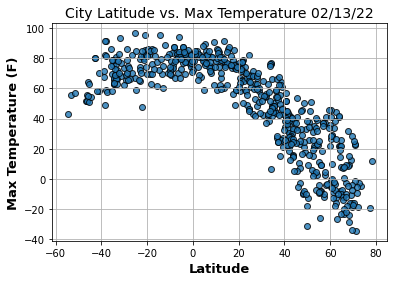

In [77]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor ='k',
            marker='o',
            alpha = 0.8,
            linewidths = 1,
            label = 'Cities'
           )

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"),  fontsize=14)
plt.ylabel("Max Temperature (F)", fontweight= 'bold', fontsize=13)
plt.xlabel("Latitude", fontweight='bold', fontsize=13)
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png", bbox_inches = 'tight', facecolor = 'white')

# Show plot.
plt.show()

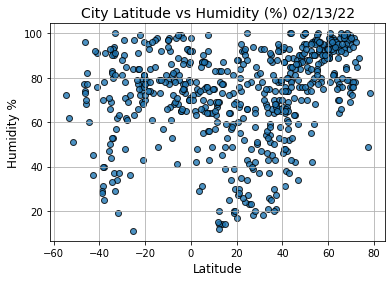

In [88]:
# Build the scatter plot fot latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolor='k',
            marker='o',
            alpha = 0.8,
            linewidths = 1,
            label='Cities')
plt.title(f"City Latitude vs Humidity (%) "+ time.strftime("%x"), fontsize=14)
plt.ylabel(f"Humidity %", fontsize=12)
plt.xlabel(f"Latitude", fontsize=12)
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png", bbox_inches='tight', facecolor='white')

# Show plot.
plt.show()

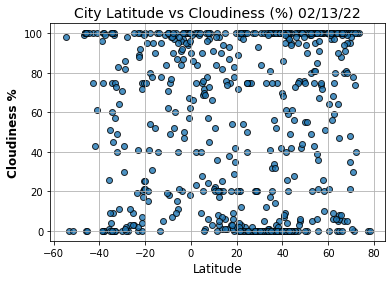

In [89]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor='k',
            marker='o',
            alpha=0.8,
            linewidths=1,
            label='Cities'
           )
plt.title(f'City Latitude vs Cloudiness (%) ' + time.strftime("%x"), fontsize=14)
plt.ylabel(f"Cloudiness %", fontsize=12, fontweight='bold')
plt.xlabel(f"Latitude", fontsize=12)
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png", facecolor='white')

# Show plot.
plt.show()

In [90]:
# Build the scatter plot for latitude vs wind speed.
plt.scattter(lats,
             wind_speed,
             edgecolor='k',
             marker='o',
             alpha=0.8,
             linewidths=1,
             label='Cities'
            )
plt.title(f"City Latitude vs Wind Speed (%) " + time.strftime("%x"), fontsize=14)
plt.ylabel(f"Clss %", fontsize=12, fontweigh t='bold')
plt.xlabel(f")

SyntaxError: EOL while scanning string literal (4121410735.py, line 12)